In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df = df.drop(columns=['car_ID', 'CarName'])


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
X = df.drop('price', axis=1)
y = df['price']

In [6]:
#standardization

In [7]:
X = (X - X.mean()) / X.std()

In [8]:
#train-test split

In [14]:
split = int(0.8 * len(df))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [15]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train.to_numpy()]
X_test = np.c_[np.ones(X_test.shape[0]), X_test.to_numpy()]

y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [16]:
weights = np.zeros((X_train.shape[1], 1))
learning_rate = 0.01
epochs = 1000

In [17]:
m = len(y_train)
losses = []

for i in range(epochs):
    y_pred = X_train @ weights
    error = y_pred - y_train
    
    gradient = (1/m) * (X_train.T @ error)
    weights -= learning_rate * gradient
    
    loss = np.mean(error ** 2)
    losses.append(loss)

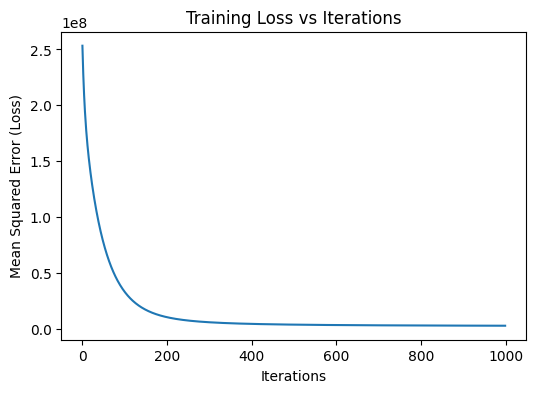

In [18]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Training Loss vs Iterations")
plt.show()

In [19]:
y_test_pred = X_test @ weights

In [20]:
mse = np.mean((y_test - y_test_pred) ** 2)
rmse = np.sqrt(mse)

mse, rmse

(np.float64(22635754.953477632), np.float64(4757.704798900162))

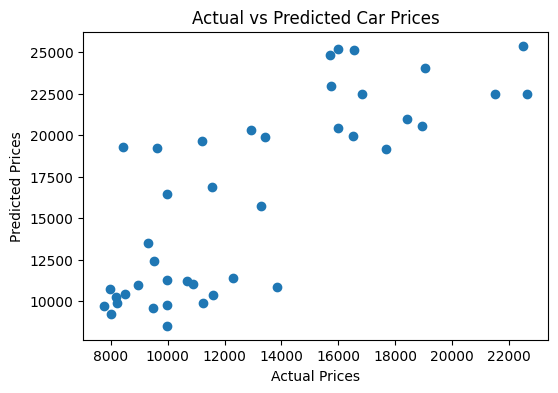

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()